In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle

In [ ]:
data=pd.read_csv("/content/kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
data.columns=['id','age','blood_pressure','specific_gravity','albumin',
'sugar','red_blood_cell','pus_cell','pus_cell_clumps','bacteria',
'blood glucose random','blood_urea','serum_creatinine','sodium','potassium',
'hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
'hypertension','diabetesmellitus','coronary_artery_diseas','appetite',
'pedal_edema','anemia','class']#manually giving the name of the columns
data.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cell', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_diseas', 'appetite', 'pedal_edema',
       'anemia', 'class'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      400 non-null    int64  
 1   age                     391 non-null    float64
 2   blood_pressure          388 non-null    float64
 3   specific_gravity        353 non-null    float64
 4   albumin                 354 non-null    float64
 5   sugar                   351 non-null    float64
 6   red_blood_cell          248 non-null    object 
 7   pus_cell                335 non-null    object 
 8   pus_cell_clumps         396 non-null    object 
 9   bacteria                396 non-null    object 
 10  blood glucose random    356 non-null    float64
 11  blood_urea              381 non-null    float64
 12  serum_creatinine        383 non-null    float64
 13  sodium                  313 non-null    float64
 14  potassium               312 non-null    fl

In [ ]:
data.isnull().any()

id                        False
age                        True
blood_pressure            False
specific_gravity           True
albumin                    True
sugar                      True
red_blood_cell             True
pus_cell                   True
pus_cell_clumps            True
bacteria                   True
blood glucose random      False
blood_urea                False
serum_creatinine           True
sodium                     True
potassium                 False
hemoglobin                False
packed_cell_volume         True
white_blood_cell_count     True
red_blood_cell_count       True
hypertension               True
diabetesmellitus           True
coronary_artery_diseas     True
appetite                   True
pedal_edema                True
anemia                     True
class                     False
dtype: bool

In [ ]:
data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)


TypeError: ignored

In [ ]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_diseas'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specific_gravity'.fillna(data['specific_gravity'].mode()[0],inplace=True)


SyntaxError: ignored

In [ ]:
catcols=set(data.dtypes[data.dtypes=='0'].index.values)
print(catcols)

set()


In [ ]:
for i in catcols:
  print("columns:",i)
  print(c(data[i]))
  print('*'*120+'\n')

In [ ]:
catcols.removed('red_blood_cell_count')
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)

NameError: ignored

In [ ]:
contcols=set(data.dtypes[data.dtypes!='0'].index.values)
print(contcols)

{'red_blood_cell_count', 'pus_cell', 'appetite', 'class', 'albumin', 'bacteria', 'hypertension', 'blood_pressure', 'blood_urea', 'diabetesmellitus', 'sodium', 'packed_cell_volume', 'white_blood_cell_count', 'age', 'coronary_artery_diseas', 'red_blood_cell', 'hemoglobin', 'serum_creatinine', 'pedal_edema', 'id', 'anemia', 'blood glucose random', 'potassium', 'pus_cell_clumps', 'specific_gravity', 'sugar'}


In [ ]:
for i in contcols:
  print("continous columns:",i)
  print(c(data[i]))
  print('*'*120+'\n')

continous columns: red_blood_cell_count


NameError: ignored

In [ ]:
contcols.removed('specific-gravity')
contcols.removed('albumin')
contcols.removed('sugar')
print(contcols)

AttributeError: ignored

In [ ]:
data.replace()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cell,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_diseas,appetite,pedal_edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])

AttributeError: ignored

In [ ]:
data['diabetesmellitus']=data.diabetesmellitus.replace={'\tno':'no','\tyes','yes','yes':
c(data['diabetesmellitus'])

SyntaxError: ignored

task3

In [ ]:
data.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,blood glucose random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,400.000000,391.000000,400.000000,353.000000,354.000000,351.000000,400.000000,400.000000,383.000000,313.000000,400.000000,400.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.476298,0.005717,1.352679,1.099191,74.782634,49.285887,5.741126,10.408752,2.819783,2.716171
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000
50%,199.500000,55.000000,78.234536,1.020000,0.000000,0.000000,126.000000,44.000000,1.300000,138.000000,4.627244,12.526437
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,150.000000,61.750000,2.800000,142.000000,4.800000,14.625000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


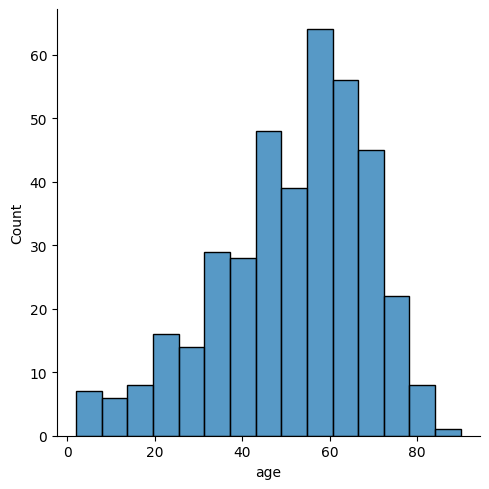

In [ ]:
sns.displot(data.age)

Text(0.5, 1.0, 'ageVSblood scatter plot')

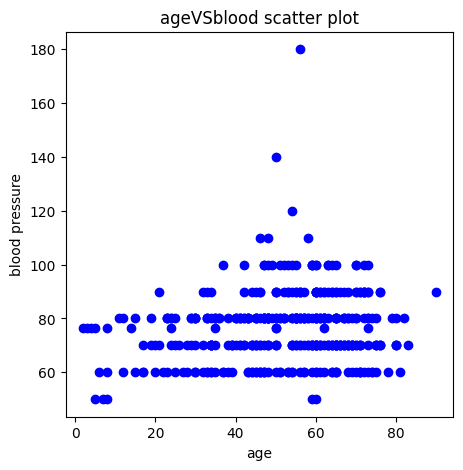

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
plt.scatter(data['age'],data['blood_pressure'],color='blue')
plt.xlabel('age')
plt.ylabel('blood pressure')
plt.title("ageVSblood scatter plot")

In [ ]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1


for column in contcols:
   if plotnumber<=11  :
      ax = plt.subplot(3,4,plotnumber)
      plt.scatter(data['age'],data[column])
      plt.xlabel(column,fontsize=20)

    plotnumber+=1 
 plt.show()

IndentationError: ignored

<ipython-input-29-faf20fff7e45>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,fmt="2f",ax=ax,linewidths=0.5,linecolor="orange")


AttributeError: ignored

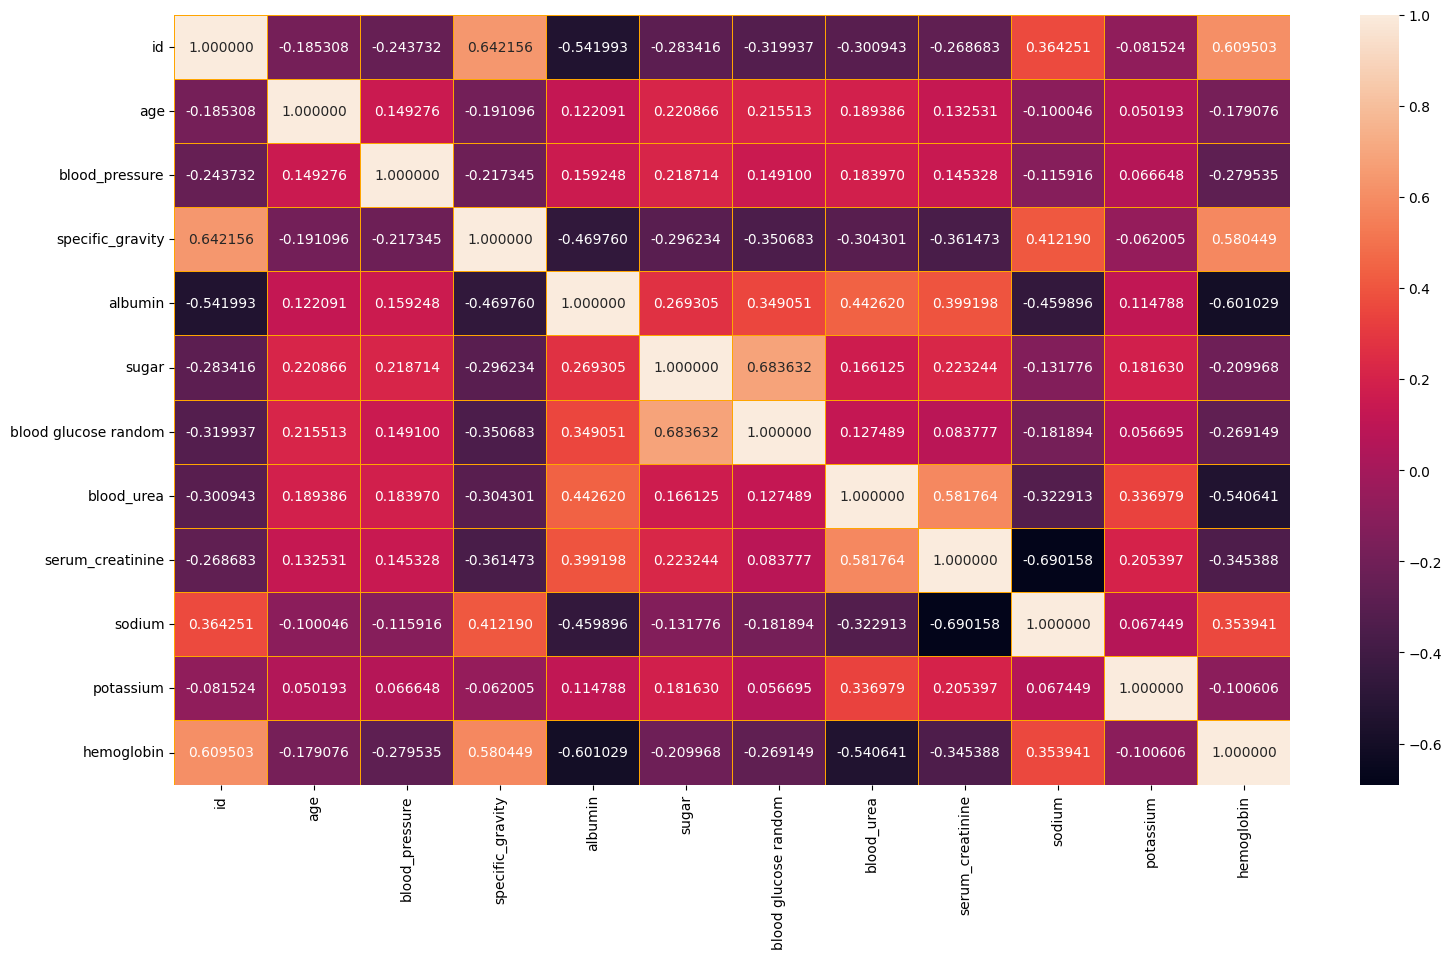

In [ ]:
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,fmt="2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(roation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
sns.countplot(data['class'])

ValueError: ignored

In [ ]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler
x_bal=sc.fit_transform(X)

NameError: ignored

In [ ]:
selcols=['red_blood_cell','pus_cell','blood glucose random','blood_urea',
         'pedal_edema','anemia','diabetesmelliitus','coronary_artery_disease']
x=pd.Datframea(data,columns=selcols)
y=pd.dataframe(data,columns=['class'])
print(x.shape)
print(y.shape)

AttributeError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

NameError: ignored

task 4

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import


SyntaxError: ignored

In [ ]:
classification=sequential()
classification.add(Dense(30,activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dene(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(1,activation='sogmoid'))

NameError: ignored

In [ ]:
classification.compile(optimizer='adam',loss='binary_crossentropy',metrics=[accuracy])


NameError: ignored

In [ ]:
classification.fit(x_train,y_train,batch_size=10,validation_split=0,2,epochs=100)



SyntaxError: ignored

In [ ]:
from  sklearn.ensemble import Randomforestclassifier
rfc = RandomForestclassifier(n_estimators=10,criterion='entropy')

ImportError: ignored

In [ ]:
rfc.fit(x_train,y_train)


NameError: ignored

In [ ]:
y_predict = rfc.predict(x_test)


NameError: ignored

In [ ]:
y_predict_train = rfc.predict(x_train)

NameError: ignored

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [ ]:
dtc.fit(x_train,y_train)

NameError: ignored

In [ ]:
y_predict= dtc.predict(x_test)
y_predict

NameError: ignored

In [ ]:
y_predict_train = dtc.predict(x_train)


NameError: ignored

In [ ]:
from sklearn import linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

SyntaxError: ignored

In [ ]:
, classification_report

from sklearn.metrics import accuracy_score,classification_report
y_predict = lgr.predict(x_test)


NameError: ignored

In [ ]:
y_pred = lgr.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)


NameError: ignored

In [ ]:
y_pred - dtc.predict([[1,1,121.000000,36.0,0,1,0]])
print(y_pred)
(y_pred)

NameError: ignored

In [ ]:
y_pred = rfc.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

NameError: ignored

In [ ]:
classification.save("ckd.hs")


NameError: ignored

In [ ]:
y_pred

NameError: ignored

In [ ]:
y_pred = (y_pred > 0.5)
y_pred

NameError: ignored

In [ ]:
def predict_exit(sample_value):
  sample_value = np.array(sample_value)
  sample_value = sample_value.reshape(1, -1)
  sample_value = sc.transform(sample_value)
  return classifier.predict(sample_value)
  

In [ ]:
rest=classification.predict([[1,1,121.000000,36.0,0,0,1,0]])
if test==1:
      print('prediction: High chance of CKD!')
else:
      print('prediction: Low chance of CKD.')
        

NameError: ignored

task 5


In [ ]:
from sklearn import model_selection

In [ ]:
from os import name
from sklearn.exceptions import FitFailedWarning
KFold,
      dfs = []
models = [
          ('LogReg',LogisticRegression()),
          ('RF',RandomForestclassifier()),
          ('DecisionTree',DecisionTreeClassifier()),
         ] 
results = []
     names = []
     scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted','roc_auc']
     target_name = ['NO CKD','CKD']
     for name,model in models:
           Kfold = model_selection.KFold(n_splits=5,shuffle=true,random_state=90210)
           CV_results = model_selection.cross_validate(model,x_train,y_train,cv=kfold,scoring=scoring)
           clf = model.Fit(x_train,y_train)
           y_pred = clf.predict(x_test)
           print(name)
           print(classification_report(y_test,y_pred,target_names=target_names))
           results.append(cv_results)
           names.append(name)
           this_df = pd.dataframe(cv_results)
           this_df['model'] = name
           dfs.append(this_df)
     final = pd.concat(dfs,ignore_index=true)
     return final             
      

IndentationError: ignored

In [ ]:
from sklearn.mertics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

ModuleNotFoundError: ignored

In [ ]:
plt.plt.figure(figsize=(8,6))
sns.heatmap(cm,cmap='blues',annot=true,xticklabels=['no ckd','ckd'],yticklabels=['no ckd','ckd'])
plt.xlabel('predicted values')
plt.ylabel('actual value')
plt.title('confusion matrix for logistic regression model')
plt.show()

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
cm-confusion_matrix(y_test,y_predict)
cm

NameError: ignored

In [ ]:
plt.figure(figsize-(8,6))
sns.heatmap(cm,cmap-'blues',annot-true,xticklabels=['no ckd','ckd'],yticklabels=['no ckd''ckd'])
plt.xlabel('predicted values')
plt.ylabel('Actual values')
plt.title('confusion matrix for randomforestclassifier')
plt.show()


NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

NameError: ignored

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,cmap='Blues',annot=true,xtricklabels=['no ckd','ckd'],yticklabels=['no ckd','ckd'])
plt.xlabel('predicted values')
plt.ylabel('Actual values')
plt.title('confusion matrix for DecisionTreeClassifier')
plt.show()


NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

NameError: ignored

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,cmap='Blues',annot=True,xticklabels=['no ckd','ckd'],yticklabels=['no ckd','ckd'])
plt.xlabel('predicted values')
plt.ylabel('Actual values')
plt.title('confusion matrix for ANN model')
plt.show()

NameError: ignored

In [ ]:
from sqlalchemy.sql.expression import true
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model] 
    bootstrap = model_df.sample(n=30,replace=true) 
    bootstraps.append(bootstrap)
bootstrap_df = pd.concat(bootstraps,igore_index=true)  
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrcs',value_name='values')
time_metrics = ['fit_time','score_time']# fit time matrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)]# get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')
                                    
                                      


NameError: ignored

In [ ]:
import matplotlip.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model",y="values",hue="metrics",data=result_long_nofit,palette="set3")
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.title('comparison of model by classificartion metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)


ModuleNotFoundError: ignored

task 6

In [ ]:
pickle.dump(lgr, open('CKD.pkl','wb'))

NameError: ignored

In [ ]:
from flask import flask,render_template,request
import numpy as np
import pickle

ImportError: ignored

In [ ]:
app = flask(_name_) # initializing a flask app
model = pickle.load(open('CKD.pkl','rb')) # loading the model



NameError: ignored

In [ ]:
@app.route('/') # route to display the home page
def home():
    return render_template('home.html') # rendering the home page
    

NameError: ignored

In [ ]:
@app.route('/prediction',methods=['POST','GET'])
def prediction():
    return render_template('indexnew.html')
@app.route('/Home',methods=['POST','GET'])
def my_home():
    return render_template('home.html')
@app.route('/predict',methods=['POST']) # route to show the predictions in a web UI
def predict():
    #reading the inouts given by the user
    input_features = [float(x) for x in request.form.values()]
    features_values = [np.array(input_features)]
    features_name = ['blood_urea','blood glucose random','anemia',
                     'coronary_artery_disease','pus_cell','red_blood_cells',
                     'diabetesmellitus','pedal_edema']
    df = pd.Dataframe(features_value,columns=features_name)
    # predictions using the loaded model file
    output = model.predict(df) 
                         
    

NameError: ignored

In [ ]:
# showing the prediction results in a UI# showing the prediction results in a UI
return render_template('results.html',prediction_text=output)

SyntaxError: ignored

In [ ]:
if_name_=='_main_'
   # running the app
   app.run(debug=true) 

IndentationError: ignored